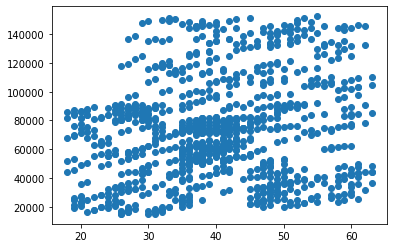

     Gender  Age  AnnualSalary  Purchased
0      Male   35         20000          0
1      Male   40         43500          0
2      Male   49         74000          0
3      Male   40        107500          1
4      Male   25         79000          0
..      ...  ...           ...        ...
995    Male   38         59000          0
996  Female   47         23500          0
997  Female   28        138500          1
998  Female   48        134000          1
999  Female   44         73500          0

[1000 rows x 4 columns]


In [1]:
import numpy as np
from pandas import *
import matplotlib.pyplot as plt


data=read_csv("../Data/car_data.csv")

age=data["Age"].tolist()
alsal=data["AnnualSalary"].tolist()



plt.plot(age,alsal,"o")
plt.show()
data1=data.drop(columns=["User ID"])
print(data1)

In [2]:
from sklearn import preprocessing
pe=preprocessing.LabelEncoder()
data1["Gender"]=pe.fit_transform(data1["Gender"])
print(data1)

     Gender  Age  AnnualSalary  Purchased
0         1   35         20000          0
1         1   40         43500          0
2         1   49         74000          0
3         1   40        107500          1
4         1   25         79000          0
..      ...  ...           ...        ...
995       1   38         59000          0
996       0   47         23500          0
997       0   28        138500          1
998       0   48        134000          1
999       0   44         73500          0

[1000 rows x 4 columns]


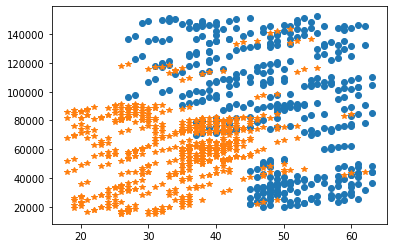

In [3]:
pos=data1[data1.Purchased==1]
neg=data1[data1.Purchased==0]
page=pos["Age"].tolist()
palsal=pos["AnnualSalary"].tolist()
nage=neg["Age"].tolist()
nalsal=neg["AnnualSalary"].tolist()
plt.plot(page,palsal,"o")
plt.plot(nage,nalsal,"*")
plt.show()

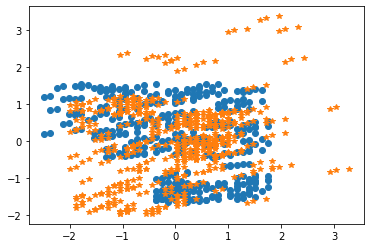

In [4]:
from sklearn.preprocessing import StandardScaler
st=StandardScaler()



pos=data1[data1.Purchased==1]
neg=data1[data1.Purchased==0]
page=pos["Age"].tolist()
palsal=pos["AnnualSalary"].tolist()
nage=neg["Age"].tolist()
nalsal=neg["AnnualSalary"].tolist()
page=np.array(page).reshape(-1,1)
palsal=np.array(palsal).reshape(-1,1)
nage=np.array(nage).reshape(-1,1)
nalsal=np.array(nalsal).reshape(-1,1)
page=st.fit_transform(page)
palsal=st.fit_transform(palsal)
nage=st.fit_transform(nage)
nalsal=st.fit_transform(nalsal)
plt.plot(page,palsal,"o")
plt.plot(nage,nalsal,"*")
plt.show()

In [5]:
from random import random
from sklearn.model_selection import train_test_split
x=data1.iloc[:,:-1]
y=data1["Purchased"]
x_train_data,x_test_data,y_train_data,y_test_data=train_test_split(x,y,test_size=0.2,random_state=25)
print(x.shape)
print(y.shape)
print(x)
print(y)

(1000, 3)
(1000,)
     Gender  Age  AnnualSalary
0         1   35         20000
1         1   40         43500
2         1   49         74000
3         1   40        107500
4         1   25         79000
..      ...  ...           ...
995       1   38         59000
996       0   47         23500
997       0   28        138500
998       0   48        134000
999       0   44         73500

[1000 rows x 3 columns]
0      0
1      0
2      0
3      1
4      0
      ..
995    0
996    0
997    1
998    1
999    0
Name: Purchased, Length: 1000, dtype: int64


In [6]:
from sklearn import tree
from sklearn.metrics import f1_score
tclf=tree.DecisionTreeClassifier()
tclf.fit(x_train_data,y_train_data)
t_pred=tclf.predict(x_test_data)
print(t_pred)
print(f1_score(t_pred,y_test_data))


[0 0 1 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 0 1 0 1 1 1
 0 1 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0
 1 0 1 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 0 1 0 1 1 1 1 0 0 0 0 1 0 0 1 1 0 0 1 1 0 0 0 1 0 0 0 1 1 0
 0 1 0 1 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 1 1 0 1 1 0 0 1 0 1 1 1 0 1
 1 1 0 1 1 0 0 1 0 0 1 0 0 1 1]
0.8831168831168831
